#  Tweets from @jairbolsonaro profile

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# Defining functions

In [2]:
def rename_cols(df):
    cols = df.columns
    cols = cols.str.replace(' ', '_').str.lower().str.replace('.', '_')
    df.columns = cols
    return(df)

In [3]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def word_cloud_figure(col,
            max_words=None,
            background_color='white',
            stopwords=None):
    string_text = str(col)
    wordCloud = WordCloud(max_words=max_words,
                        repeat=False,
                        stopwords=stopwords,
                        background_color=background_color
                        ).generate(string_text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    return(plt.show())

In [4]:
def serie_to_string(col):
    ''' tranform a Pandas Series into a string'''
    string = ''
    for i in col:
        string = string + (" ".join(i.split()))
    return(string)

In [5]:
# data cleaning
import re
def strip_link(col):
    ''' a function for removing urls from a tweet'''
    url_pattern = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    col = re.sub(url_pattern, '', col)
    return(col)

def strip_sw(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

import unidecode
def strip_accent(text):
    '''a function that removes accents using unidecode'''
    text_clean = ''.join(i for i in unidecode.unidecode(text))
    return(text_clean)

# remove punctionation
# https://www.kaggle.com/itratrahman/nlp-tutorial-using-python
def strip_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)    

# gether the results from the remove links, sw, strip accent and punctuation
def data_cleaning(text):
    text_clean = strip_link(text)
    text_clean = strip_punctuation(text_clean)
    text_clean = strip_sw(text_clean)
    text_clean = strip_accent(text_clean)
    return(text_clean)

In [6]:
# pre processing

from nltk.stem import SnowballStemmer
def stemming(text):
    stem = SnowballStemmer('portuguese', ignore_stopwords=True)
    text = [stem.stem(word) for word in text.split()]
    return(' '.join(text))

from textblob import Word
def lemmatization(col):
    col = col.apply(lambda x: ' '.join(
        [Word(x).lemmatize() for x in x.split()]))
    return(col)

In [7]:
# feature extracton
def emojis(col):
    pattern = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
    emoji = regexp_tokenize(col, pattern)
    return(emoji)

from nltk.tokenize import regexp_tokenize
def hashtags(col):
    pattern = r'#\w+'
    hashtag = regexp_tokenize(col, pattern)
    return(hashtag)

def length(text):
    return(len(text))

In [8]:
import pandas as pd

# returns a boolean series after searched for a string pattern
def count_themes(col, df, pattern_df):
    # extrat list of lables
    subject_list = [i for i in pattern_df.iloc[:,0]]
    # extrat list of patterns
    pattern_list = [i for i in pattern_df.iloc[:,1]]
    pattern_extraction = []
    # interate through each pattern element
    for i in pattern_list:
        # for each pattern extract matched terms and returns a boolean
        pattern_extraction.append(df[col].str.extract((i)).notnull())
    # concat the list
    df_themes = pd.concat(pattern_extraction, axis=1)
    # rename new dataframe
    df_themes.columns = columns_list
    # concat the original with the new dataframe
    df_total = pd.concat([df, df_themes], axis=1)
    return(df_total, df_themes)

In [9]:
from sys import path
path.append('/Users/liviaclarete/gdrive/code/functions/')

from GoogleSheet_read_returns_df import gsheet_returns_df
from GoogleSheet_writes_gsheet import write_df_gsheet
from NLP_count_themes_boolean import count_themes

# Import and check data

In [10]:
import pandas as pd

In [11]:
# importing xlsx into a pandas dataframe
df = pd.read_excel('Jair_Bolsonaro.xlsx')

# selecting tweets from @jairbolsonaro account
df = df[df['Author name']=='Jair M. Bolsonaro']
df.head(1)

# Select columns
cols = ['id', 'Detail', 'Link', 'Update date', 'Publish date', 'Tags', 'Audience', 'Reach', 'Interactions']
df = df[cols]
df = rename_cols(df)

In [12]:
# check the dataset
print(df.shape)
df.head(1)

(1809, 9)


,id,detail,link,update_date,publish_date,tags,audience,reach,interactions
0,336912077,- Resumo de nossa ida a Pelotas/RS por ocasião...,https://twitter.com/jairbolsonaro/status/11612...,30/09/2019 09:17:00,13/08/2019 08:28:34,NaN,4856491,165120,41447


# Tranform variable's type

## datetime

In [13]:
df['date'] = pd.to_datetime(df.publish_date)

# set date as an index
df.index = df.date

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1809 entries, 2019-08-13 08:28:34 to 2019-03-01 00:35:35
Data columns (total 10 columns):
id              1809 non-null int64
detail          1809 non-null object
link            1809 non-null object
update_date     1809 non-null object
publish_date    1809 non-null object
tags            292 non-null object
audience        1809 non-null int64
reach           1809 non-null int64
interactions    1809 non-null int64
date            1809 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 155.5+ KB


## Numeric variables

In [15]:
# select numerical columns
cols_num = df.describe().columns.to_list()

In [16]:
# transform object columns into numeric
for i in cols_num:
    df[i] = pd.to_numeric(df[i])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1809 entries, 2019-08-13 08:28:34 to 2019-03-01 00:35:35
Data columns (total 10 columns):
id              1809 non-null int64
detail          1809 non-null object
link            1809 non-null object
update_date     1809 non-null object
publish_date    1809 non-null object
tags            292 non-null object
audience        1809 non-null int64
reach           1809 non-null int64
interactions    1809 non-null int64
date            1809 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 155.5+ KB


# Handling missing values

In [21]:
# count the number of missing values within each variable
df.isnull().sum()

id                 0
detail             0
link               0
update_date        0
publish_date       0
tags            1517
audience           0
reach              0
interactions       0
date               0
dtype: int64

# Data cleaning

In [31]:
# # importing and downloading corpus from nltk
# import nltk
# nltk.download()

In [35]:
# stopwords variables
from nltk.corpus import stopwords
sw_pt = stopwords.words('portuguese') 
sw_en = stopwords.words('english')
sw_new = ['é', 'r', 'ser', 'via', 'sobre', 'ainda', '"', '“', 'após', 'tudo', 'cada', 'todo', '…rt', '1', 'outros', '”', 'sendo', 'vamos', 'anos', 'hoje', '...']
from string import digits
sw_digits = [i for i in digits]
sw = sw_pt + sw_en + sw_new + sw_digits

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1809 entries, 2019-08-13 08:28:34 to 2019-03-01 00:35:35
Data columns (total 10 columns):
id              1809 non-null int64
detail          1809 non-null object
link            1809 non-null object
update_date     1809 non-null object
publish_date    1809 non-null object
tags            292 non-null object
audience        1809 non-null int64
reach           1809 non-null int64
interactions    1809 non-null int64
date            1809 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 155.5+ KB


In [37]:
# cleaning tweet texts
df['text_clean'] = df.detail.apply(data_cleaning)

In [38]:
df.head(1)

,id,detail,link,update_date,publish_date,tags,audience,reach,interactions,date,text_clean
date,,,,,,,,,,,
2019-08-13 08:28:34,336912077,- Resumo de nossa ida a Pelotas/RS por ocasião...,https://twitter.com/jairbolsonaro/status/11612...,30/09/2019 09:17:00,13/08/2019 08:28:34,NaN,4856491,165120,41447,2019-08-13 08:28:34,resumo ida pelotasrs ocasiao entrega trecho br...


# Feature extraction 

In [39]:
# create column with RT or Tweets from author
df['type_post'] = df.detail.str.startswith('RT')

# replace False by post, and True by retweet
type_posts = {False: 'post', True:'retweet'}
df['type_post'] = df.type_post.map(type_posts)

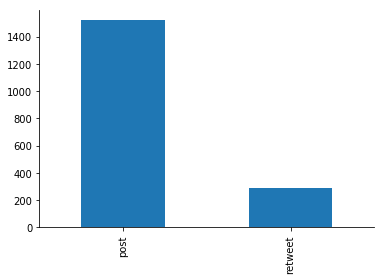

In [40]:
# plot a chart
df.type_post.value_counts().plot(kind='bar')
sns.despine();

# Pre-processing

## Stemming

In [41]:
df['text_stem'] = df.text_clean.apply(stemming)

In [42]:
df.text_stem.head(2)

date
2019-08-13 08:28:34       resum ida pelotasrs ocasia entreg trech br 116
2019-08-13 16:47:07    parabens atlet represent brasil jog panamerica...
Name: text_stem, dtype: object

# DataViz

In [43]:
# transform Pandas Series into a list of strings
# clear stop words
from nltk.tokenize import word_tokenize
text_str = serie_to_string(df.text_clean)

text_list = [w for w in word_tokenize(text_str) 
              if w not in sw]

In [44]:
# count most frequent words
from collections import Counter
Counter(text_list).most_common(10)

[('brasil', 361),
 ('governo', 199),
 ('presidente', 124),
 ('todos', 123),
 ('pais', 99),
 ('bolsonaro', 90),
 ('economia', 89),
 ('dia', 87),
 ('grande', 83),
 ('nacional', 73)]

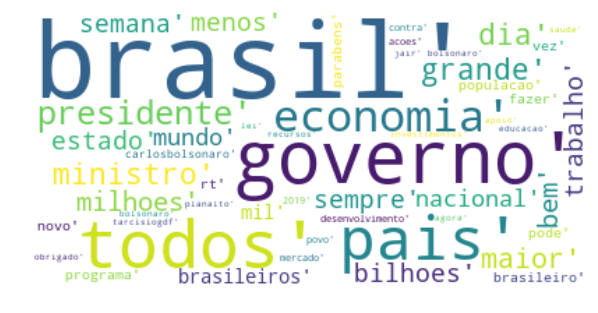

In [45]:
word_cloud_figure(text_list,
                  max_words=50,
                  stopwords=['pode', 'rt', 'contra', 'maior', 'menos']
                 )

# Ruled bases classification
* Connect with Gspreadsheet available at: https://docs.google.com/spreadsheets/d/1QCoj40GLI9nvj8tTxuMROqLGJlu1QLd0E8w1mwE2cdw/edit#gid=0

In [46]:
# retrieve stringlines from a google spreadsheet
strings_df = gsheet_returns_df('tematicas_bolsonaro', 'strings_bolsonaro')

df_total, df_themes = count_themes('text_clean', df, strings_df)

In [47]:
table = pd.DataFrame([df_themes.sum()/df_themes.shape[0]*100, df_themes.sum()]).T
table.columns = ['%', 'count']
table = table.sort_values(by='count', ascending=False)

In [48]:
table

,%,count
Brasil,31.840796,576.0
Economia,25.152018,455.0
Relações internacionais,9.563295,173.0
Governo,9.342178,169.0
Infraestrutura,6.412383,116.0
"Educação, ciência e tecnologia",6.301824,114.0
Segurança pública,5.638474,102.0
Esquerda,4.975124,90.0
Militares,4.919845,89.0
Legislativo,4.311774,78.0


In [49]:
# calculate the total number of classified tweets
# returns a column summing the number of True's
df_themes['total'] = df_themes.sum(axis=1)

# transform the number into a boolean
df_themes['total'] = df_themes.total.apply(lambda x: x>0)

# sum the total number of True's in total column
label_tweets = round(df_themes.total.sum()/df_themes.total.shape[0]*100)

print(f'{label_tweets}% of tweets were classified. Still {100-label_tweets} to classify.')

70.0% of tweets were classified. Still 30.0 to classify.


In [50]:
# for i, j in enumerate(df_total[df_total.Economia == True]['detail']):
#     print(i, j, end='\n  ', sep='----')

# Retweets

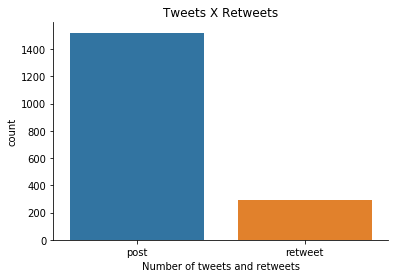

In [51]:
# plot number of tweets and rt's
sns.countplot(df.type_post)
plt.title('Tweets X Retweets')
plt.xlabel('Number of tweets and retweets')
sns.despine()

In [52]:
# selecting retweets dataset
retweets = df[df.type_post=='retweet']

# identify who Bolsonaro is retweeting
retweets['rt_author'] = sum([re.findall('RT (@\w+)', i) for i in df.detail], [])

In [53]:
retweets.head(1)

,id,detail,link,update_date,publish_date,tags,audience,reach,interactions,date,text_clean,type_post,text_stem,rt_author
date,,,,,,,,,,,,,,
2019-08-13 22:23:25,337446779,RT @DamaresAlves: Tiraram dinheiro da construç...,https://twitter.com/jairbolsonaro/status/11615...,30/09/2019 09:17:00,13/08/2019 22:23:25,Bolsonaro,4872196,165654,0,2019-08-13 22:23:25,rt damaresalves tiraram dinheiro construcao re...,retweet,rt damaresalv tir dinheir construca reform pre...,@DamaresAlves


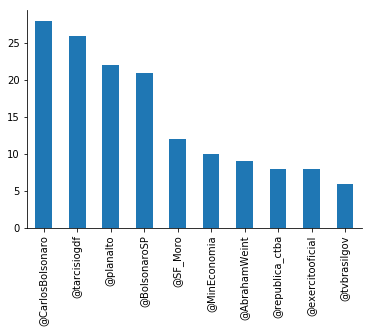

In [54]:
retweets.rt_author.value_counts()[:10].plot(kind='bar')
sns.despine();

# LDA

In [55]:
# tokenizing data
tokenized_data = df.text_stem.str.split()

In [56]:
import gensim
from gensim import corpora


# Creating a term dictionary of the text corpus
dictionary = corpora.Dictionary(tokenized_data)

# creating a Document Text Matrix with the dictionary
doc_term_matrix = [dictionary.doc2bow(i) for i in tokenized_data]


In [57]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [58]:
# Printing the topics
lda_model.print_topics()

[(0,
  '0.017*"rt" + 0.004*"jairbolsonar" + 0.004*"desenvolv" + 0.004*"pass" + 0.004*"2019" + 0.004*"nov" + 0.004*"invest" + 0.004*"men" + 0.004*"port" + 0.004*"regia"'),
 (1,
  '0.013*"brasil" + 0.009*"govern" + 0.009*"econom" + 0.008*"rt" + 0.007*"ministr" + 0.006*"merc" + 0.005*"liv" + 0.005*"invest" + 0.005*"seman" + 0.005*"president"'),
 (2,
  '0.019*"bolsonar" + 0.013*"rt" + 0.012*"jair" + 0.011*"..." + 0.011*"govern" + 0.007*"president" + 0.005*"trabalh" + 0.005*"nov" + 0.005*"medic" + 0.004*"assist"'),
 (3,
  '0.010*"econom" + 0.009*"brasil" + 0.007*"paul" + 0.006*"govern" + 0.006*"previdenc" + 0.006*"public" + 0.006*"brasileir" + 0.005*"pod" + 0.005*"med" + 0.005*"nov"'),
 (4,
  '0.013*"rt" + 0.007*"mil" + 0.007*"trabalh" + 0.007*"govern" + 0.006*"ministr" + 0.005*"pass" + 0.005*"ano" + 0.005*"educaca" + 0.005*"dav" + 0.004*"exercitooficial"'),
 (5,
  '0.022*"tod" + 0.016*"brasil" + 0.010*"govern" + 0.009*"pais" + 0.009*"dia" + 0.006*"grand" + 0.006*"brasileir" + 0.006*"deus" 

In [59]:
import pyLDAvis
import pyLDAvis.gensim

# Downalod dictionaries from spacy -- lemmatization
# !python -m spacy download en # one time run
# !python -m spacy download pt # one time run

import matplotlib.pyplot as plt
import seaborn as sns

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.096417  0.059911       1        1  24.140038
5      0.111419 -0.179267       2        1  20.100611
1      0.070044  0.069872       3        1  16.441805
3      0.070728  0.067600       4        1  13.858467
4     -0.084321  0.026638       5        1  10.153928
2     -0.137146 -0.107756       6        1   7.965953
0     -0.127141  0.063002       7        1   7.339197, topic_info=    Category        Freq       Term       Total  loglift  logprob
60   Default   86.000000   bolsonar   86.000000  30.0000  30.0000
370  Default  190.000000        tod  190.000000  29.0000  29.0000
41   Default  155.000000     econom  155.000000  28.0000  28.0000
79   Default  255.000000         rt  255.000000  27.0000  27.0000
16   Default  382.000000     brasil  382.000000  26.0000  26.0000
..       ...         ...        ...         ...      ...      ...
153   Topic7    6.199702      estad   87.942032  -0.0402  -5.8900
544   Topic7    5.732271        mil   51.401398   0.4184  -5.9684
31    Topic7    5.290469  represent   21.556473   1.2072  -6.0486
197   Topic7    5.234113      feder   17.502007   1.4048  -6.0593
181   Topic7    5.321380        dev   58.252537   0.2189  -6.0428

[498 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
121       1  0.224419     ...
121       2  0.299225     ...
121       3  0.074806     ...
121       4  0.049871     ...
121       5  0.066495     ...
...     ...       ...     ...
1645      4  0.066230   vitim
1929      2  0.151969    voos
1929      7  0.759846    voos
5612      5  0.812755     wef
167       3  0.940131  youtub

[939 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 2, 4, 5, 3, 1])

# KMEANS

In [60]:
# importing tfidf vectorizer and kmeans function
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [61]:
# Creating a Tdidf table
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.text_stem.values)
%time

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 17.9 µs


In [62]:
# setting the kmeans function
true_k = 7
model = KMeans(n_clusters=true_k,
              init='k-means++',
              max_iter=100,
              n_init=3,
              verbose=True)

model.fit(X)
%time

Initialization complete
Iteration  0, inertia 1758.460
Iteration  1, inertia 1738.099
Iteration  2, inertia 1737.720
Iteration  3, inertia 1737.648
Iteration  4, inertia 1737.502
Iteration  5, inertia 1737.393
Converged at iteration 5: center shift 0.000000e+00 within tolerance 1.627841e-08
Initialization complete
Iteration  0, inertia 1763.912
Iteration  1, inertia 1745.087
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.627841e-08
Initialization complete
Iteration  0, inertia 3378.170
Iteration  1, inertia 1732.918
Iteration  2, inertia 1729.768
Iteration  3, inertia 1727.406
Iteration  4, inertia 1725.341
Iteration  5, inertia 1724.549
Iteration  6, inertia 1724.231
Iteration  7, inertia 1723.995
Iteration  8, inertia 1723.884
Iteration  9, inertia 1723.795
Iteration 10, inertia 1723.762
Iteration 11, inertia 1723.758
Iteration 12, inertia 1723.754
Converged at iteration 12: center shift 0.000000e+00 within tolerance 1.627841e-08
CPU times: user 7 µs, sys: 1 µ

In [63]:
# get the features and the centroids
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
%time

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 14.1 µs


In [64]:
for i in range(true_k):
    print("Cluster %d:" %i),
    for ind in order_centroids[i, :10]:
        print("%s" %terms[ind])
%time

Cluster 0:
rt
1type12
president
bolsonar
obrig
liv
jair
brasileir
ministr
carlosbolsonar
Cluster 1:
br
brasil
acim
tod
boa
deus
noit
mud
vid
futur
Cluster 2:
nacional
crim
sfmor
combat
seguranc
projet
congress
lei
integr
rt
Cluster 3:
dia
bom
tod
grand
abrac
trabalh
fort
pais
1br
feliz
Cluster 4:
brasil
govern
tod
faz
boa
pais
noit
pod
brasileir
part
Cluster 5:
econom
empreg
nov
ger
brasil
desenvolv
invest
previdenc
mineconom
brasileir
Cluster 6:
parabens
brbrbr
agor
brasil
20
ministr
obrig
retorn
grand
br1
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.9 µs


In [65]:
print("\n")
print("Prediction")
X = vectorizer.transform(['namorar ficar sexo relacionamento'])



Prediction


In [66]:
predicted = model.predict(X)
print(predicted)

[0]


In [67]:
# apply the model to the data
b = vectorizer.transform(list(df.text_stem))

# predict the labels
b_predict = model.predict(b)

In [68]:
b_predict

array([1, 6, 6, ..., 4, 0, 0], dtype=int32)